### Chopper tests in RTSA mode

Notes on RTSA Mode: 
- Max BW: 10MHz
- Lowest RBW: 24.4KHz
- Acq Time: 20.1ms (lowest) 
- Recording settings: Set Time interval to MIN
- There are two times tha dictate recording interval, one is "Acqusition Time" and other "Recording Interval" 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd 
import glob
import matplotlib.pyplot as plt

In [ ]:
#!ls

In [2]:
def read_fieldfox(file):
    data = np.array(pd.read_csv(file,skiprows = 32))
    freq = data[:-1,0].astype(float)
    power= data[:-1,1].astype(float)
    return freq, power

def read_rtsa_file(file):
    final_df = []
    data = pd.read_csv(file,skiprows = 17,header=None)
    data=data.drop([0,2,3,4],axis=1)
    with open(file,'r') as f:
        for i,line in enumerate(f):
            if 'Freq Hz' in line:
                break
    cols=line.split(',')[5:]
    cols = ['Datetime'] + cols
    data.columns=cols
    final_df.append(data)  
    return pd.concat(final_df,ignore_index=True)

In [3]:
rtsa_df = read_rtsa_file('RTAutoSession18_chopeer_mode_alternating.csv')

/home/mrudula/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
rtsa_df['Datetime'] = pd.to_datetime(rtsa_df['Datetime'])

<IPython.core.display.Javascript object>


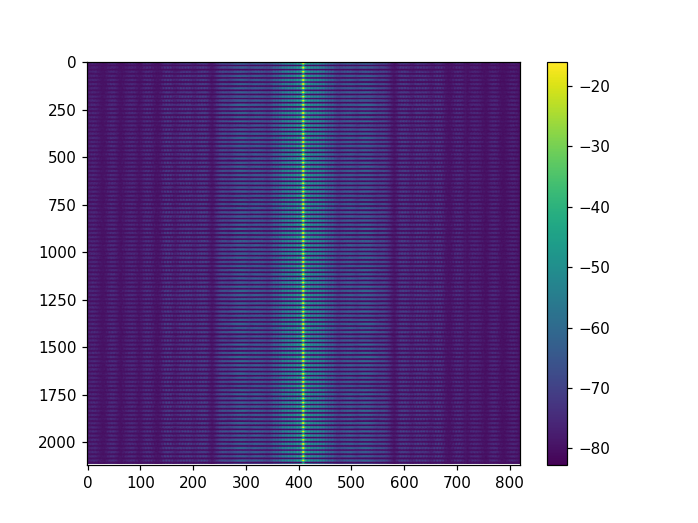

In [5]:
plt.figure()
plt.imshow(rtsa_df.iloc[:,2:], aspect = 'auto')
plt.colorbar()

<IPython.core.display.Javascript object>


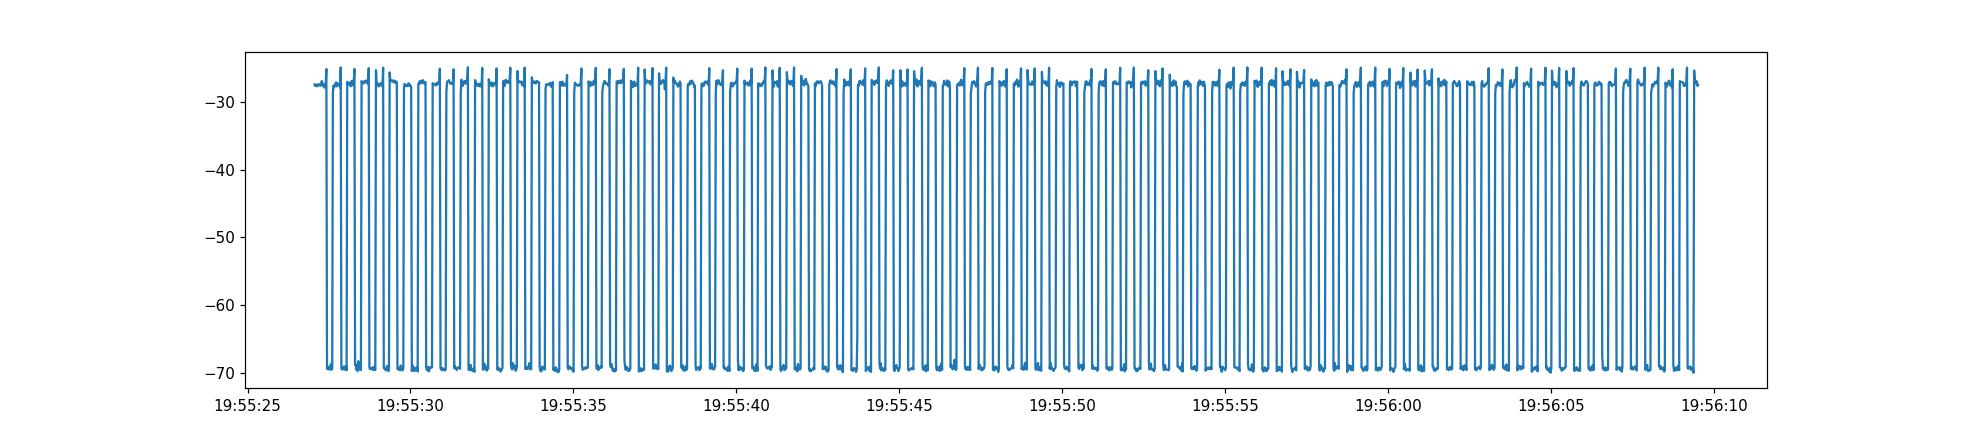

In [7]:
#Recording time interval set to MIN
#Chopper set to alternating mode 
plt.figure(figsize= (18,4))
plt.plot(rtsa_df.iloc[:,0],rtsa_df.iloc[:,409])

In [8]:
# what is the interval of recording? 
for i in range(10):
    print(rtsa_df['Datetime'].values[i+1] - rtsa_df['Datetime'].values[i])

20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds


In [9]:
#Recording Interval set to 10ms, chopper set to alternating mode
rtsa_df_10 = read_rtsa_file('RTSAutoSession20_chopper_alternating_recinterval_10ms.csv')
rtsa_df_10['Datetime'] = pd.to_datetime(rtsa_df_10['Datetime'])

/home/mrudula/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
for i in range(20):
    print(rtsa_df_10['Datetime'].values[i+1] - rtsa_df_10['Datetime'].values[i])
#uh not 10ms and not even consistent?

140000000 nanoseconds
40000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
40000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
40000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds
20000000 nanoseconds


<IPython.core.display.Javascript object>


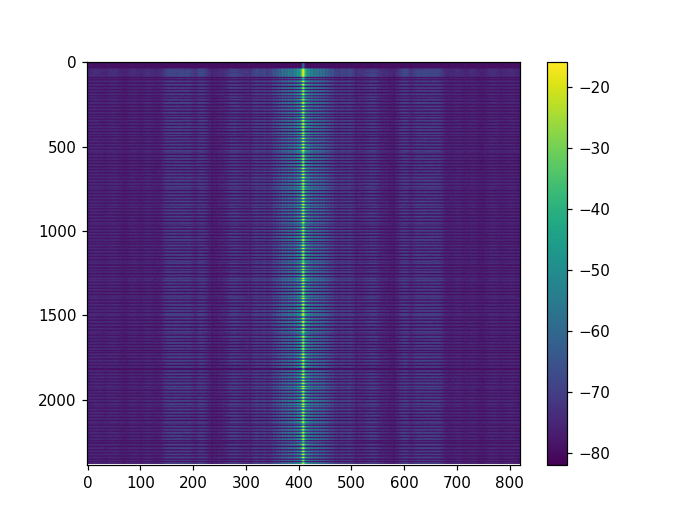

In [11]:
plt.figure()
plt.imshow(rtsa_df_10.iloc[:,2:], aspect = 'auto')
plt.colorbar()

<IPython.core.display.Javascript object>


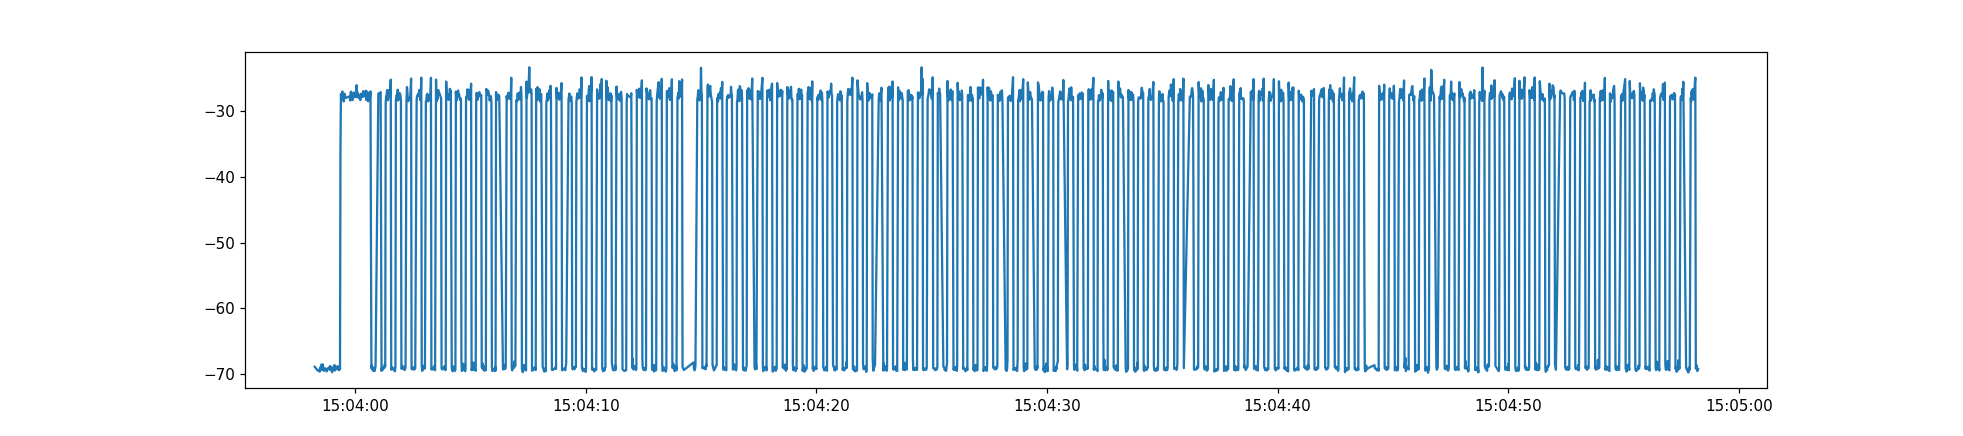

In [12]:
plt.figure(figsize= (18,4))
plt.plot(rtsa_df_10.iloc[:,0],rtsa_df_10.iloc[:,409])

In [13]:
rtsa_df2 = read_rtsa_file('RTAutoSession21_chopper/0.csv')

/home/mrudula/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<IPython.core.display.Javascript object>


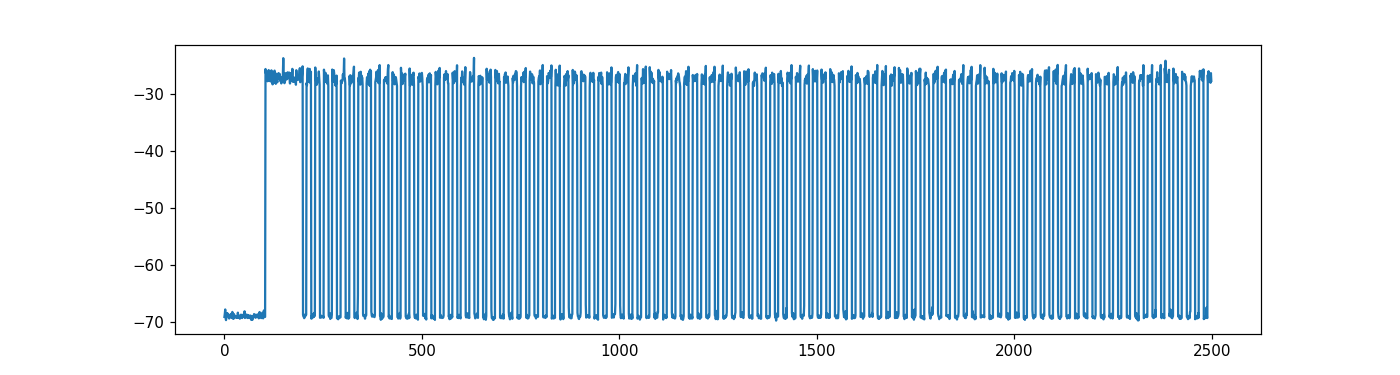

In [14]:
plt.figure()
plt.plot(rtsa_df2.iloc[:,409])

In [15]:
files = glob.glob('R*.csv')
files

['RTAutoSession16_chopper_mode_off.csv',
 'RTAutoSession17_chopper_mode_on.csv',
 'RTAutoSession18_chopeer_mode_alternating.csv',
 'RTSAutoSession20_chopper_alternating_recinterval_10ms.csv']

<IPython.core.display.Javascript object>


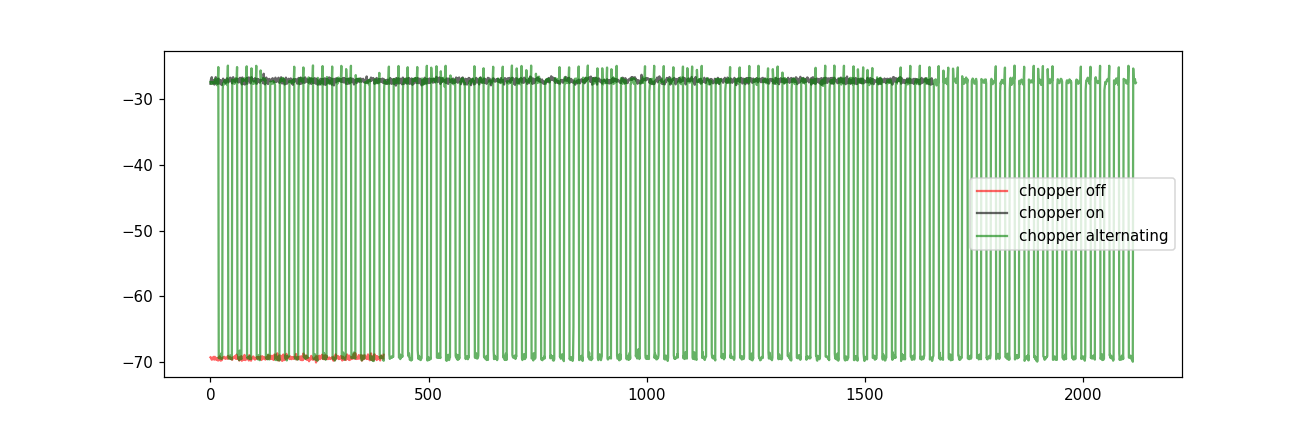

In [16]:
plt.figure()
colors = ['r', 'k', 'g']
label = ['chopper off', 'chopper on', 'chopper alternating']
for i in range(3):
    df = read_rtsa_file(files[i])
    plt.plot(df.iloc[:,409], label = label[i], color = colors[i], alpha = 0.6)
plt.legend()

<IPython.core.display.Javascript object>


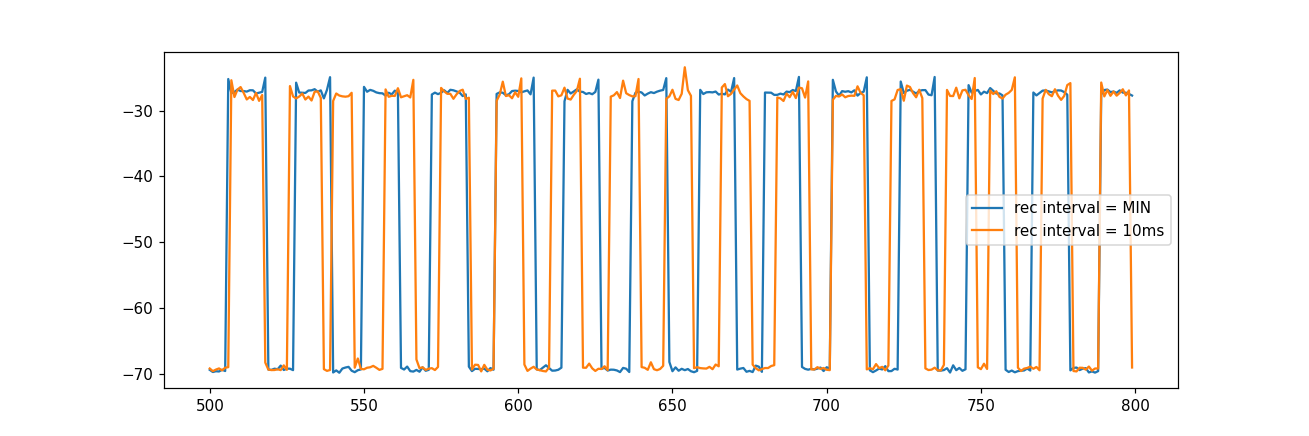

In [17]:
label = ['rec interval = MIN', 'rec interval = 10ms']
plt.figure(figsize = (12,4))
idx = [2, 3]
for i in range(len(idx)):
    df = read_rtsa_file(files[idx[i]])
    plt.plot(df.iloc[500:800,409], label = label[i])
plt.legend()